#Coding Assignment U4A1
Principal Component Analysis - Iris Flower
Author: Gowtham Iyer

In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.datasets import load_breast_cancer

## load file

In [33]:
# Importing the dataset
dataset = pd.read_csv('/content/iris.csv')

cancer = load_breast_cancer(as_frame = True)
print(cancer['feature_names'])
# creating dataframe
df = cancer.frame
# checking shape
print('Original Dataframe shape :',df.shape)
# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)
print(df.info())
print(X.info())

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float6

In [3]:
print(dataset.shape)

(150, 5)


## Separating Featureset from the Target

In [36]:
X = dataset.drop(columns='class_of_iris')
print(X.shape)
y = dataset['class_of_iris']
print(y.shape)

(150, 4)
(150,)


# Standardization of data

In [12]:
# Finding Mean
X_mean = X.mean()

# Finding Standard deviation
X_standard_dev = X.std()

# Standardization
Z = (X - X_mean) / X_standard_dev

# Finding Covariance matrix

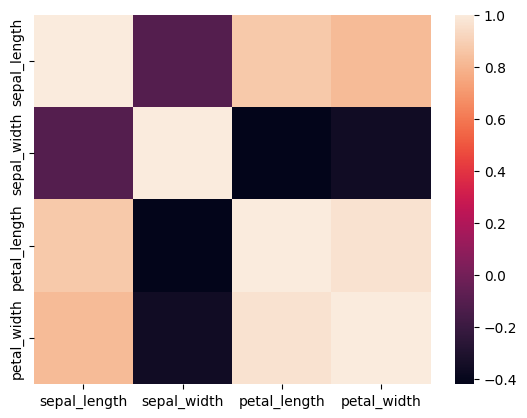

In [15]:
# Finding Covariance
covariance_matrix = Z.cov()

# Plot the covariance matrix
sns.heatmap(covariance_matrix)
plt.show()

# Computing Eigenvectors and Eigenvalues for the feature space

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Eigen values:\n', eigenvalues)
print('Shape of Eigen values:', eigenvalues.shape)
print('Shape of Eigen Vector:', eigenvectors.shape)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Shape of Eigen values: (4,)
Shape of Eigen Vector: (4, 4)


# Sorting Eigenvalues and corresponding Eigenvectors in descending order

In [19]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

print('Eigen values:\n', eigenvalues)
print('Eigen vectors:\n', eigenvectors)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


# Finding Variance

In [43]:
variance_array = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(variance_array)
#variance_array

# Ordering the variance in descending order to select top 3
idx = variance_array.argsort()[::-1]

# Sort the eigenvalues in descending order
variance_array_des = variance_array[idx]
print(variance_array_des)
eigenvectors_des = eigenvectors[:,idx]
print(eigenvectors_des)

[0.72770452 0.95800975 0.99484807 1.        ]
[1.         0.99484807 0.95800975 0.72770452]
[[ 0.26199559 -0.72101681 -0.37231836  0.52237162]
 [-0.12413481  0.24203288 -0.92555649 -0.26335492]
 [-0.80115427  0.14089226 -0.02109478  0.58125401]
 [ 0.52354627  0.6338014  -0.06541577  0.56561105]]


# Setting number of components to 3 (of top 3 variance values)

In [44]:
n_components = 3
n_components

3

                   PC1       PC2       PC3
sepal_length  0.522372 -0.372318 -0.721017
sepal_width  -0.263355 -0.925556  0.242033
petal_length  0.581254 -0.021095  0.140892
petal_width   0.565611 -0.065416  0.633801


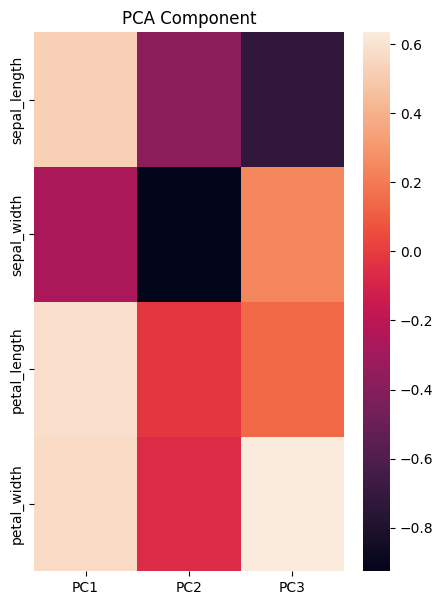

In [48]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = X.columns,
                             columns = ['PC1','PC2','PC3']
                            )
print(pca_component)
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

# Projecting the dataset in lower dimension

In [49]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2','PC3': 'PCA3' }, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

         PCA1      PCA2      PCA3
0   -2.764907 -0.487883  0.337705
1   -2.630902  0.935149  0.188937
2   -2.184972 -1.883668 -0.467913
3   -2.203737  0.183722 -0.217895
4   -2.360044  0.317414  0.051308
..        ...       ...       ...
145  1.574879 -1.068894  0.940243
146  2.009425 -0.608359  0.424493
147  1.995008 -1.045049  0.627168
148  1.841503 -0.868786  0.999413
149  2.259983 -1.915027  0.391207

[150 rows x 3 columns]


# Finding PCA using Using Sklearn

In [47]:
# Importing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)

          PC1       PC2       PC3
0   -2.764907  0.487883  0.337705
1   -2.630902 -0.935149  0.188937
2   -2.184972  1.883668 -0.467913
3   -2.203737 -0.183722 -0.217895
4   -2.360044 -0.317414  0.051308
..        ...       ...       ...
145  1.574879  1.068894  0.940243
146  2.009425  0.608359  0.424493
147  1.995008  1.045049  0.627168
148  1.841503  0.868786  0.999413
149  2.259983  1.915027  0.391207

[150 rows x 3 columns]


## Understanding the dataset

In [18]:
import seaborn as sns
# Visualising the relationship between sepal_length and flower class
sns.swarmplot(x="iris_class", y="sepal_length", data=dataset)
plt.show()

#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

ValueError: Could not interpret value `iris_class` for `x`. An entry with this name does not appear in `data`.

## Creating Logistic Reg. model and visualizing



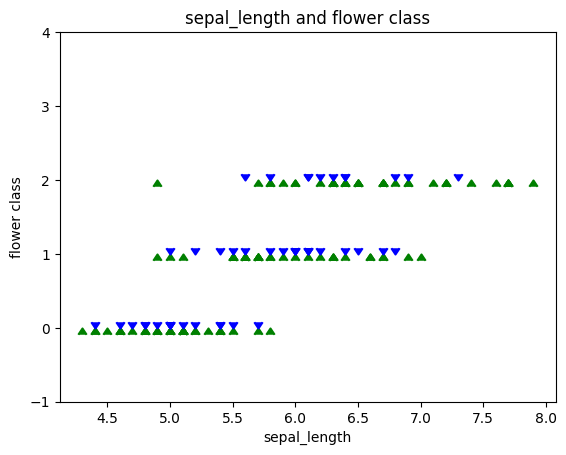

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_le = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_sepal_length, y_le,
                                                    test_size=0.3, random_state=0)

X_train = np.reshape(X_train.values, (-1,1))
X_test = np.reshape(X_test.values, (-1,1))

plt.scatter(X_train, y_train, c='g', marker=matplotlib.markers.CARETUP)
plt.scatter(X_test, y_test, c='b', marker=matplotlib.markers.CARETDOWN)
plt.title('sepal_length and flower class')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

In [ ]:
#X_sepal_length = np.reshape(X_sepal_length, (-1,1))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluate the performance of our model - Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

report = classification_report(y_test, y_pred)
print(report)

Accuracy of logistic regression classifier on test set: 0.69
[[14  2  0]
 [ 3 10  5]
 [ 0  4  7]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.62      0.56      0.59        18
           2       0.58      0.64      0.61        11

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.69      0.69      0.69        45



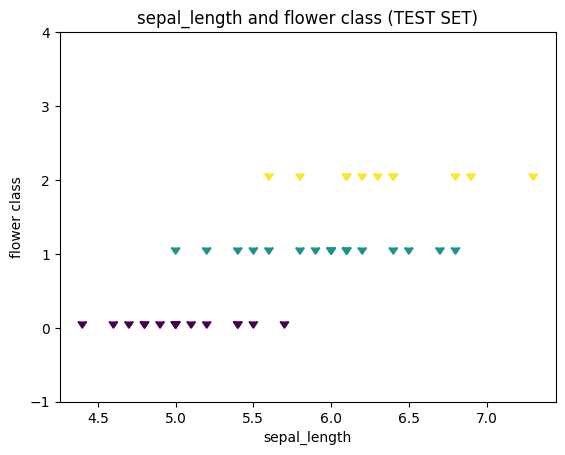

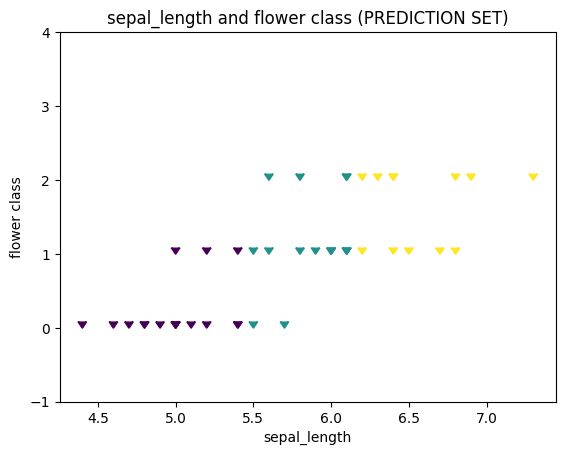

In [ ]:
# Visualising the results
plt.scatter(X_test, y_test, c=y_test, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (TEST SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

# Visualising the results
plt.scatter(X_test, y_test, c=y_pred, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (PREDICTION SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()